# High Throughput Growth Experiment Analysis in Biotechnology
***

## Background
Biotechnology requires knowledge of microbial physiology and metabolism. Among the most important information is the growth rate and the substrate uptake rate. Both can be used to calculate the effectiveness of biotechnological production strategies and biomass and product yields. To identify an organism with suitable growth parameters, multiple strains, mutants or environmental conditions are tested which results in high throughput data. To analyse high throughput data computational approaches can speed up the process.

There are different growth phenotypes: exponential, linear, saturated, diauxie. The typical microbial saturated growth is divided in different growth phases, lag, log, stationary, and death phase.

Laws to describe a biomass $N$ include: 
- exponential law: $N(t) = N_0e^{\mu t}$
  - $N_0$: initial biomass, gDW/L
  - $\mu$: growth rate, /h
  - $t$: duration, h
- logistic growth law (Verhulst): $N(t) = \frac{K}{1+\left( \frac{K-N_0}{N_0}e^{-\mu t} \right)}$
  - $N_0$: initial biomass, gDW/L
  - $\mu$: growth rate, /h
  - $t$: duration, h
  - $K$: carrying capacity, max biomass, gDW/L
- Gompertz function: $N(t) = N_0e^{\left(\textrm{ln} \left(\frac{K}{N_0} \right)\left(1 - e^{-\mu t} \right) \right)}$
  - $N_0$: initial biomass, gDW/L
  - $\mu$: growth rate, /h
  - $t$: duration, h
  - $K$: carrying capacity, max biomass, gDW/L
- Baranyi model: complex model, see [literature](https://doi.org/10.1006/fmic.1999.0285)

## Objective
1. Determine the optimal growth temperature
2. Calculate the growth rate and substrate uptake rate at different substrate concentrations
3. Evaluate the growth yields

### Additional information:
- Hagen, Exponential growth of bacteria: Constant multiplication through division, American Journal of Physics, 2010. doi [10.1119/1.3483278](https://doi.org/10.1119/1.3483278)
- Verduyn et al., A theoretical evaluation of growth yields of yeasts, Antoie van Leeuwenhoek, 1991. doi [10.1007/BF00582119](https://doi.org/10.1007/BF00582119)
- Pirt, The maintenance energy of bacteria in growing cultures, 1965. doi [10.1098/rspb.1965.0069](https://doi.org/10.1098/rspb.1965.0069)

## Workflow

**1 Set-up of simulation environment**
 * *1.1 Loading Python libraries and functions*
 * *1.2 Seeding your individual organism*

**2 High Throughput Temperature measurements**
 * *2.1 96-well plate experiment simulation* 
 * *2.2 Python based data analysis*
 * *2.3 Data export to Excel*
 
**3 Substrate uptake rates**
 * *3.1 Experiment setup (temperature, substrate concentrations, duration)*
 * *3.2 Data analysis*
 * *3.3 Data export to Excel* 

**4 Yield calculations**
 * *4.1 Yield formula*
 * *4.2 Assessment against published yields*

**5 Evaluation by peer review**
 * *5.1 Report of results*
 * *5.2 Peer review*

In [2]:
# Loading of important functionalities for the notebook:
# Loading numpy, a library fo manipulation of numbers:
import os
import numpy as np
# Loading matplotlib, a library for visualization:
import matplotlib.pyplot as plt
# Initialization, loading of all laboratory functionalities and stored models and information of the organisms:
from FermProSimFun import MonodModel as Model

from silvio.catalog.RecExpSim import RecExperiment, combine_data
from silvio.extensions.records.gene.crafted_gene import CraftedGene

from silvio.catalog.GroExpSim import *# GrowthExperiment

print('System ready')

System ready


In [3]:
exp = GrowthExperiment(161710)

In [4]:
host = exp.create_host('ecol')
exp.print_status()
vars(host.growth)

Experiment:
  budget = 10000
  failure rate = 1.0
  hosts = [ ecol ]


{'opt_growth_temp': 28,
 'max_biomass': 31,
 'Ks': 7.521,
 'Yx': 0.47,
 'k1': 0.156,
 'umax': 0.716,
 'make_generator': <bound method Host.make_generator of <silvio.catalog.GroExpSim.GroHost object at 0x7f1af26dc700>>}

[0. 2. 4. 5. 7. 9.]
Experiment:
  budget = 9506
  failure rate = 1.0
  hosts = [ ecol ]


/home/ulf/anaconda3/envs/bls_py39/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/ulf/Documents/2109_BLS+SILVIO/silvio/src/silvio/catalog/GroExpSim.py:218: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for Exp,X in Biomass.iteritems(): # LnBiomass.iteritems(), Biomass.iteritems()


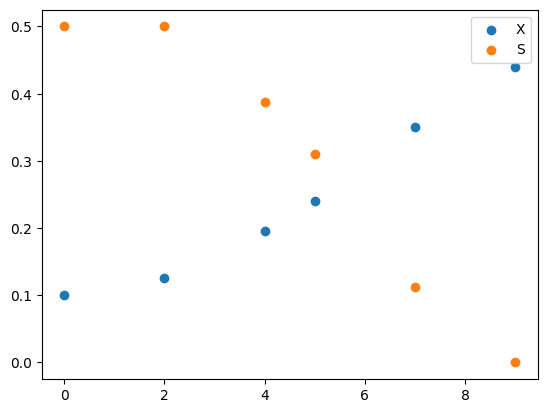

In [9]:
exp.simulate_monod(35,[10,6],'',test='Monod')
exp.print_status()

In [ ]:
myMod = Model()
# myMod.__str__()
myMod.calculate_monod()
myMod.plot_results()

"Monod_Model instance for a E. coli-batch microbial production process. \nCurrent parameters: {'u0': 0, 'umax': 0.788, 'duration': 24, 'Ks': 9.04, 'Yx': 0.407, 'k1': 0.114}"

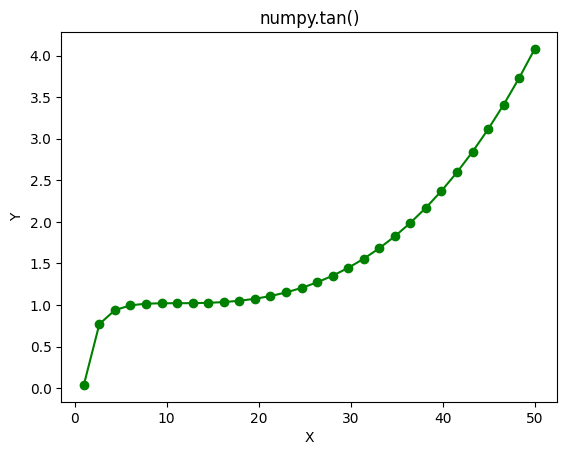

In [67]:
import numpy as np
# import math.radians as radians
 
# Importing the Matplotlib Library
import matplotlib.pyplot as plt
 
# Creating a NumPy Array of 30 evenly-spaced elements
a = np.linspace(1,50,30)
 

# logit function to generate the price for amount of sampling
# https://nathanbrixius.wordpress.com/2016/06/04/functions-i-have-known-logit-and-sigmoid/
# increasing sampling amount will increase the price until a certain point
# after that the price will remain constant until a certain point
# after that the price will increase again
# the input needs to be between 0 and 1, otherwise the function will return an error
# therefore we need to normalize the input with a saturation function
# the saturation function is a tanh function
# the saturation function will be used to normalize the input
myTanh = lambda x: np.tanh(x/20) #+ np.tanh(1/20)
myLogit = lambda x: (np.log(x/(1-x))**3 - np.log(myTanh(1)/(1-myTanh(1)))**3 + 1)/26

 
plt.plot(a, myLogit(myTanh(a)), color = "green", marker = "o")
plt.title("numpy.tan()")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()